In [1]:
import pandas as pd
import numpy as np


In [2]:
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
data=pd.read_csv("/content/customer_booking.csv",encoding='latin-1')
print(data.shape)
data.head()

(50000, 14)


,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [4]:
print(data.sales_channel.value_counts())

print(data.trip_type.value_counts())
print(data.flight_day.value_counts())
print(data.route.value_counts())
print(data.booking_origin.value_counts())
print(data.wants_extra_baggage.value_counts())
print(data.wants_preferred_seat.value_counts())
print(data.wants_in_flight_meals.value_counts())
print(data.booking_complete.value_counts())






Internet    44382
Mobile       5618
Name: sales_channel, dtype: int64
RoundTrip     49497
OneWay          387
CircleTrip      116
Name: trip_type, dtype: int64
Mon    8102
Wed    7674
Tue    7673
Thu    7424
Fri    6761
Sun    6554
Sat    5812
Name: flight_day, dtype: int64
AKLKUL    2680
PENTPE     924
MELSGN     842
ICNSIN     801
DMKKIX     744
          ... 
LBUTPE       1
CXRMEL       1
DELKBR       1
KOSSYD       1
MRUXIY       1
Name: route, Length: 799, dtype: int64
Australia               17872
Malaysia                 7174
South Korea              4559
Japan                    3885
China                    3387
                        ...  
Panama                      1
Tonga                       1
Tanzania                    1
Bulgaria                    1
Svalbard & Jan Mayen        1
Name: booking_origin, Length: 104, dtype: int64
1    33439
0    16561
Name: wants_extra_baggage, dtype: int64
0    35152
1    14848
Name: wants_preferred_seat, dtype: int64
0    28643
1    21

<Axes: xlabel='booking_complete', ylabel='count'>

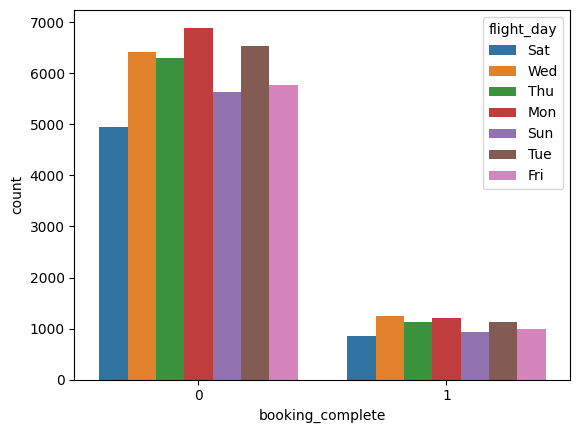

In [5]:
# sns.countplot(x=data["booking_complete"], hue=data['wants_in_flight_meals'])
# sns.countplot(x=data["booking_complete"], hue=data['wants_preferred_seat'])
sns.countplot(hue = data['flight_day'], x = data['booking_complete'])


<ipython-input-6-65e566960d46>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True)


<Axes: >

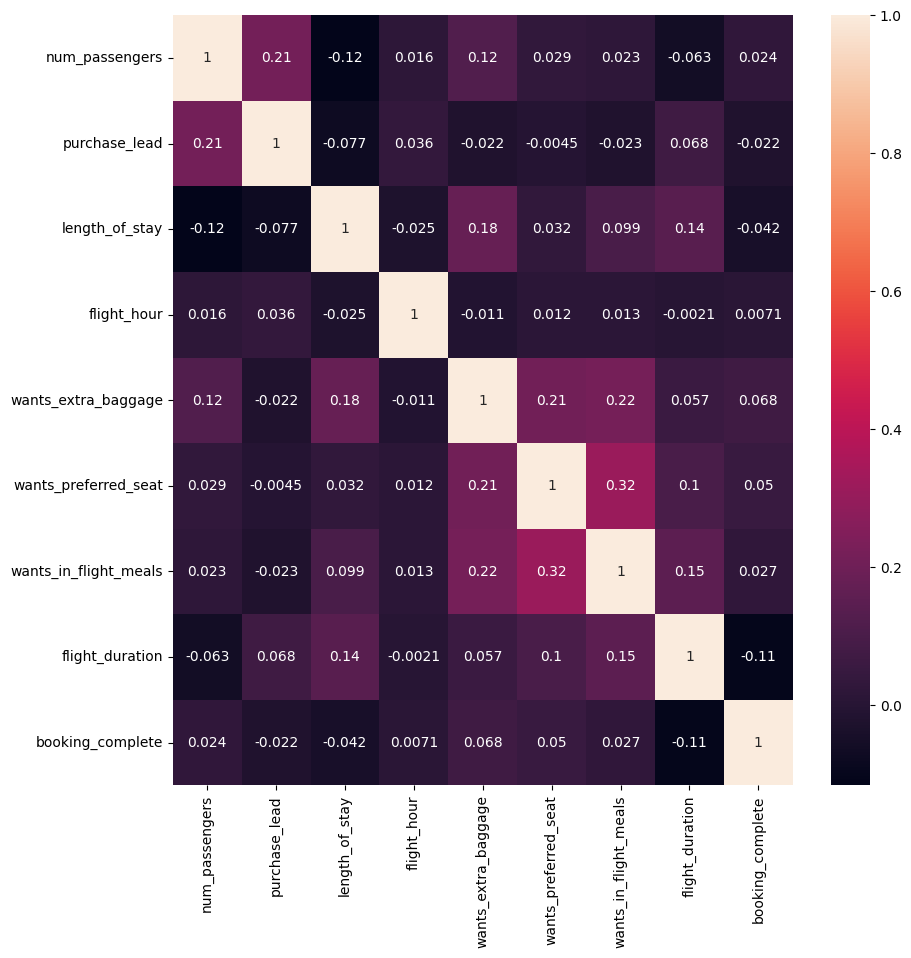

In [6]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot=True)

In [7]:
data.groupby(['wants_in_flight_meals'])['booking_complete'].mean()

wants_in_flight_meals
0    0.141396
1    0.160509
Name: booking_complete, dtype: float64

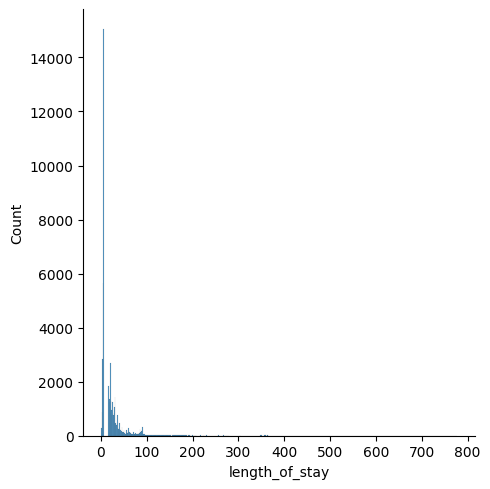

In [24]:
sns.displot(data['length_of_stay'])

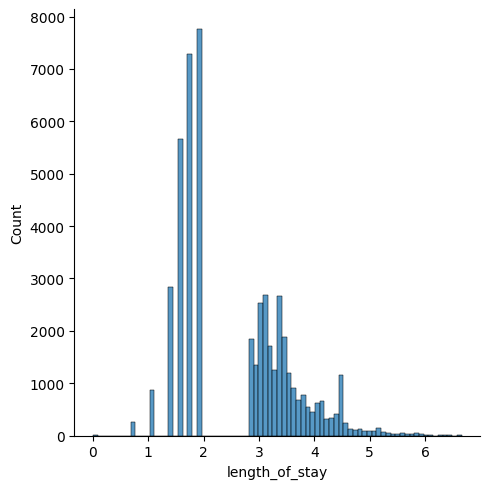

In [9]:
# data['length_of_stay']=np.log1p(data['length_of_stay'])
# sns.displot(data['length_of_stay'])

In [56]:
dummy=pd.get_dummies(data)
label=dummy['booking_complete']
dummy.drop(['booking_complete'],inplace=True, axis=1)

In [57]:
from sklearn.model_selection import train_test_split

trainX, valX, trainY, valY=train_test_split(dummy,label, test_size=0.1)

In [58]:
dummy.shape

(49990, 923)

In [59]:
from tensorflow.keras.layers import InputLayer, Normalization,Dense
from tensorflow.keras.models import Sequential


model = tf.keras.Sequential([
                             InputLayer(input_shape = (923,)),
                             Normalization(),
                             Dense(128, activation = "relu"),
                             Dense(128, activation = "relu"),
                             Dense(128, activation = "relu"),
                             Dense(1,activation='sigmoid'),
])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_4 (Normalizat  (None, 923)              1847      
 ion)                                                            
                                                                 
 dense_16 (Dense)            (None, 128)               118272    
                                                                 
 dense_17 (Dense)            (None, 128)               16512     
                                                                 
 dense_18 (Dense)            (None, 128)               16512     
                                                                 
 dense_19 (Dense)            (None, 1)                 129       
                                                                 
Total params: 153,272
Trainable params: 151,425
Non-trainable params: 1,847
____________________________________________

In [60]:
model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [61]:
model.fit(trainX,trainY,
          validation_data=(valX,valY),
          epochs=5)

Epoch 1/5
1406/1406 [==============================] - 9s 5ms/step - loss: 0.3908 - accuracy: 0.8491 - val_loss: 0.3723 - val_accuracy: 0.8516
Epoch 2/5
1406/1406 [==============================] - 6s 4ms/step - loss: 0.3597 - accuracy: 0.8501 - val_loss: 0.3613 - val_accuracy: 0.8516
Epoch 3/5
1406/1406 [==============================] - 7s 5ms/step - loss: 0.3527 - accuracy: 0.8505 - val_loss: 0.3475 - val_accuracy: 0.8516
Epoch 4/5
1406/1406 [==============================] - 6s 4ms/step - loss: 0.3485 - accuracy: 0.8513 - val_loss: 0.3502 - val_accuracy: 0.8524
Epoch 5/5
1406/1406 [==============================] - 7s 5ms/step - loss: 0.3440 - accuracy: 0.8516 - val_loss: 0.3495 - val_accuracy: 0.8522


In [30]:
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.tree import DecisionTreeClassifier
#Create an instance
classifier = BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                sampling_strategy='not majority',
                                replacement=False,
                                random_state=42)
classifier.fit(trainX, trainY)


/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_bagging.py:353: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(


BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(),
                          random_state=42, sampling_strategy='not majority')

In [ ]:
preds = classifier.predict(valX)
preds

array([0, 0, 0, ..., 0, 0, 0])

In [31]:
score=classifier.score(valX,valY)
score

0.8392

In [32]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

# fit the predictor and target
rfc.fit(trainX, trainY)

# predict
rfc_predict = rfc.predict(valX)# check performance
# print('ROCAUC score:',roc_auc_score(y_test, rfc_predict))
print('Accuracy score:',rfc.score(valX, valY))
# print('F1 score:',f1_score(valY, rfc_predict))

Accuracy score: 0.8458


In [71]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier().fit(trainX, trainY)

# predict
xgb_y_predict = xgb_model.predict(valX)

# accuracy score
xgb_score = xgb_model.score(valX, valY)



In [72]:
print('Accuracy score is:', xgb_score)

Accuracy score is: 0.8525705141028206


In [73]:
predictions = xgb_model.predict(valX)

In [37]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


<Axes: >

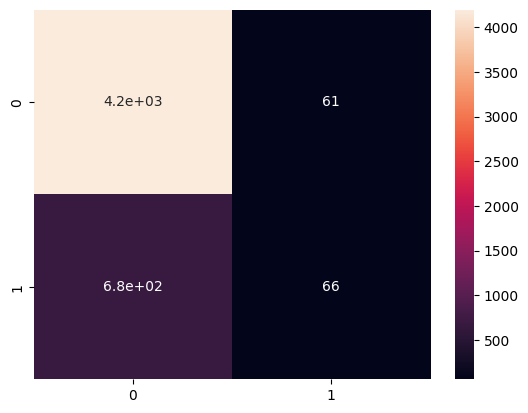

In [74]:
a=confusion_matrix(valY, predictions)
# plt.figure(figsize=(10,10))
sns.heatmap(a,annot=True)

In [75]:
report=classification_report(valY, predictions)
print(report)

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      4257
           1       0.52      0.09      0.15       742

    accuracy                           0.85      4999
   macro avg       0.69      0.54      0.54      4999
weighted avg       0.81      0.85      0.81      4999



In [45]:
data.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


<ipython-input-52-133c1fa46eff>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor=data.corr()['booking_complete'].sort_values().plot(kind='bar')


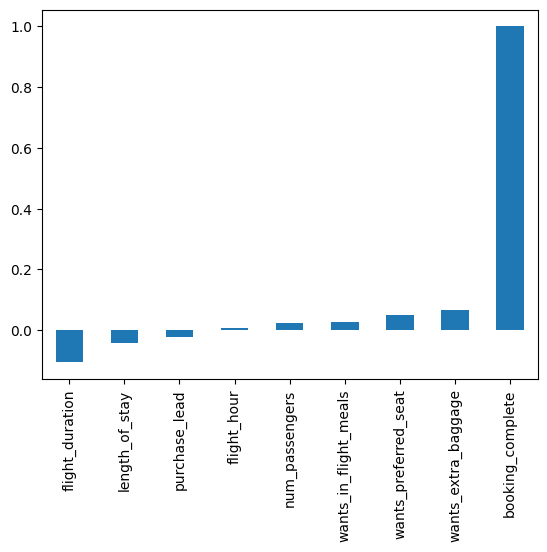

In [52]:
cor=data.corr()['booking_complete'].sort_values().plot(kind='bar')

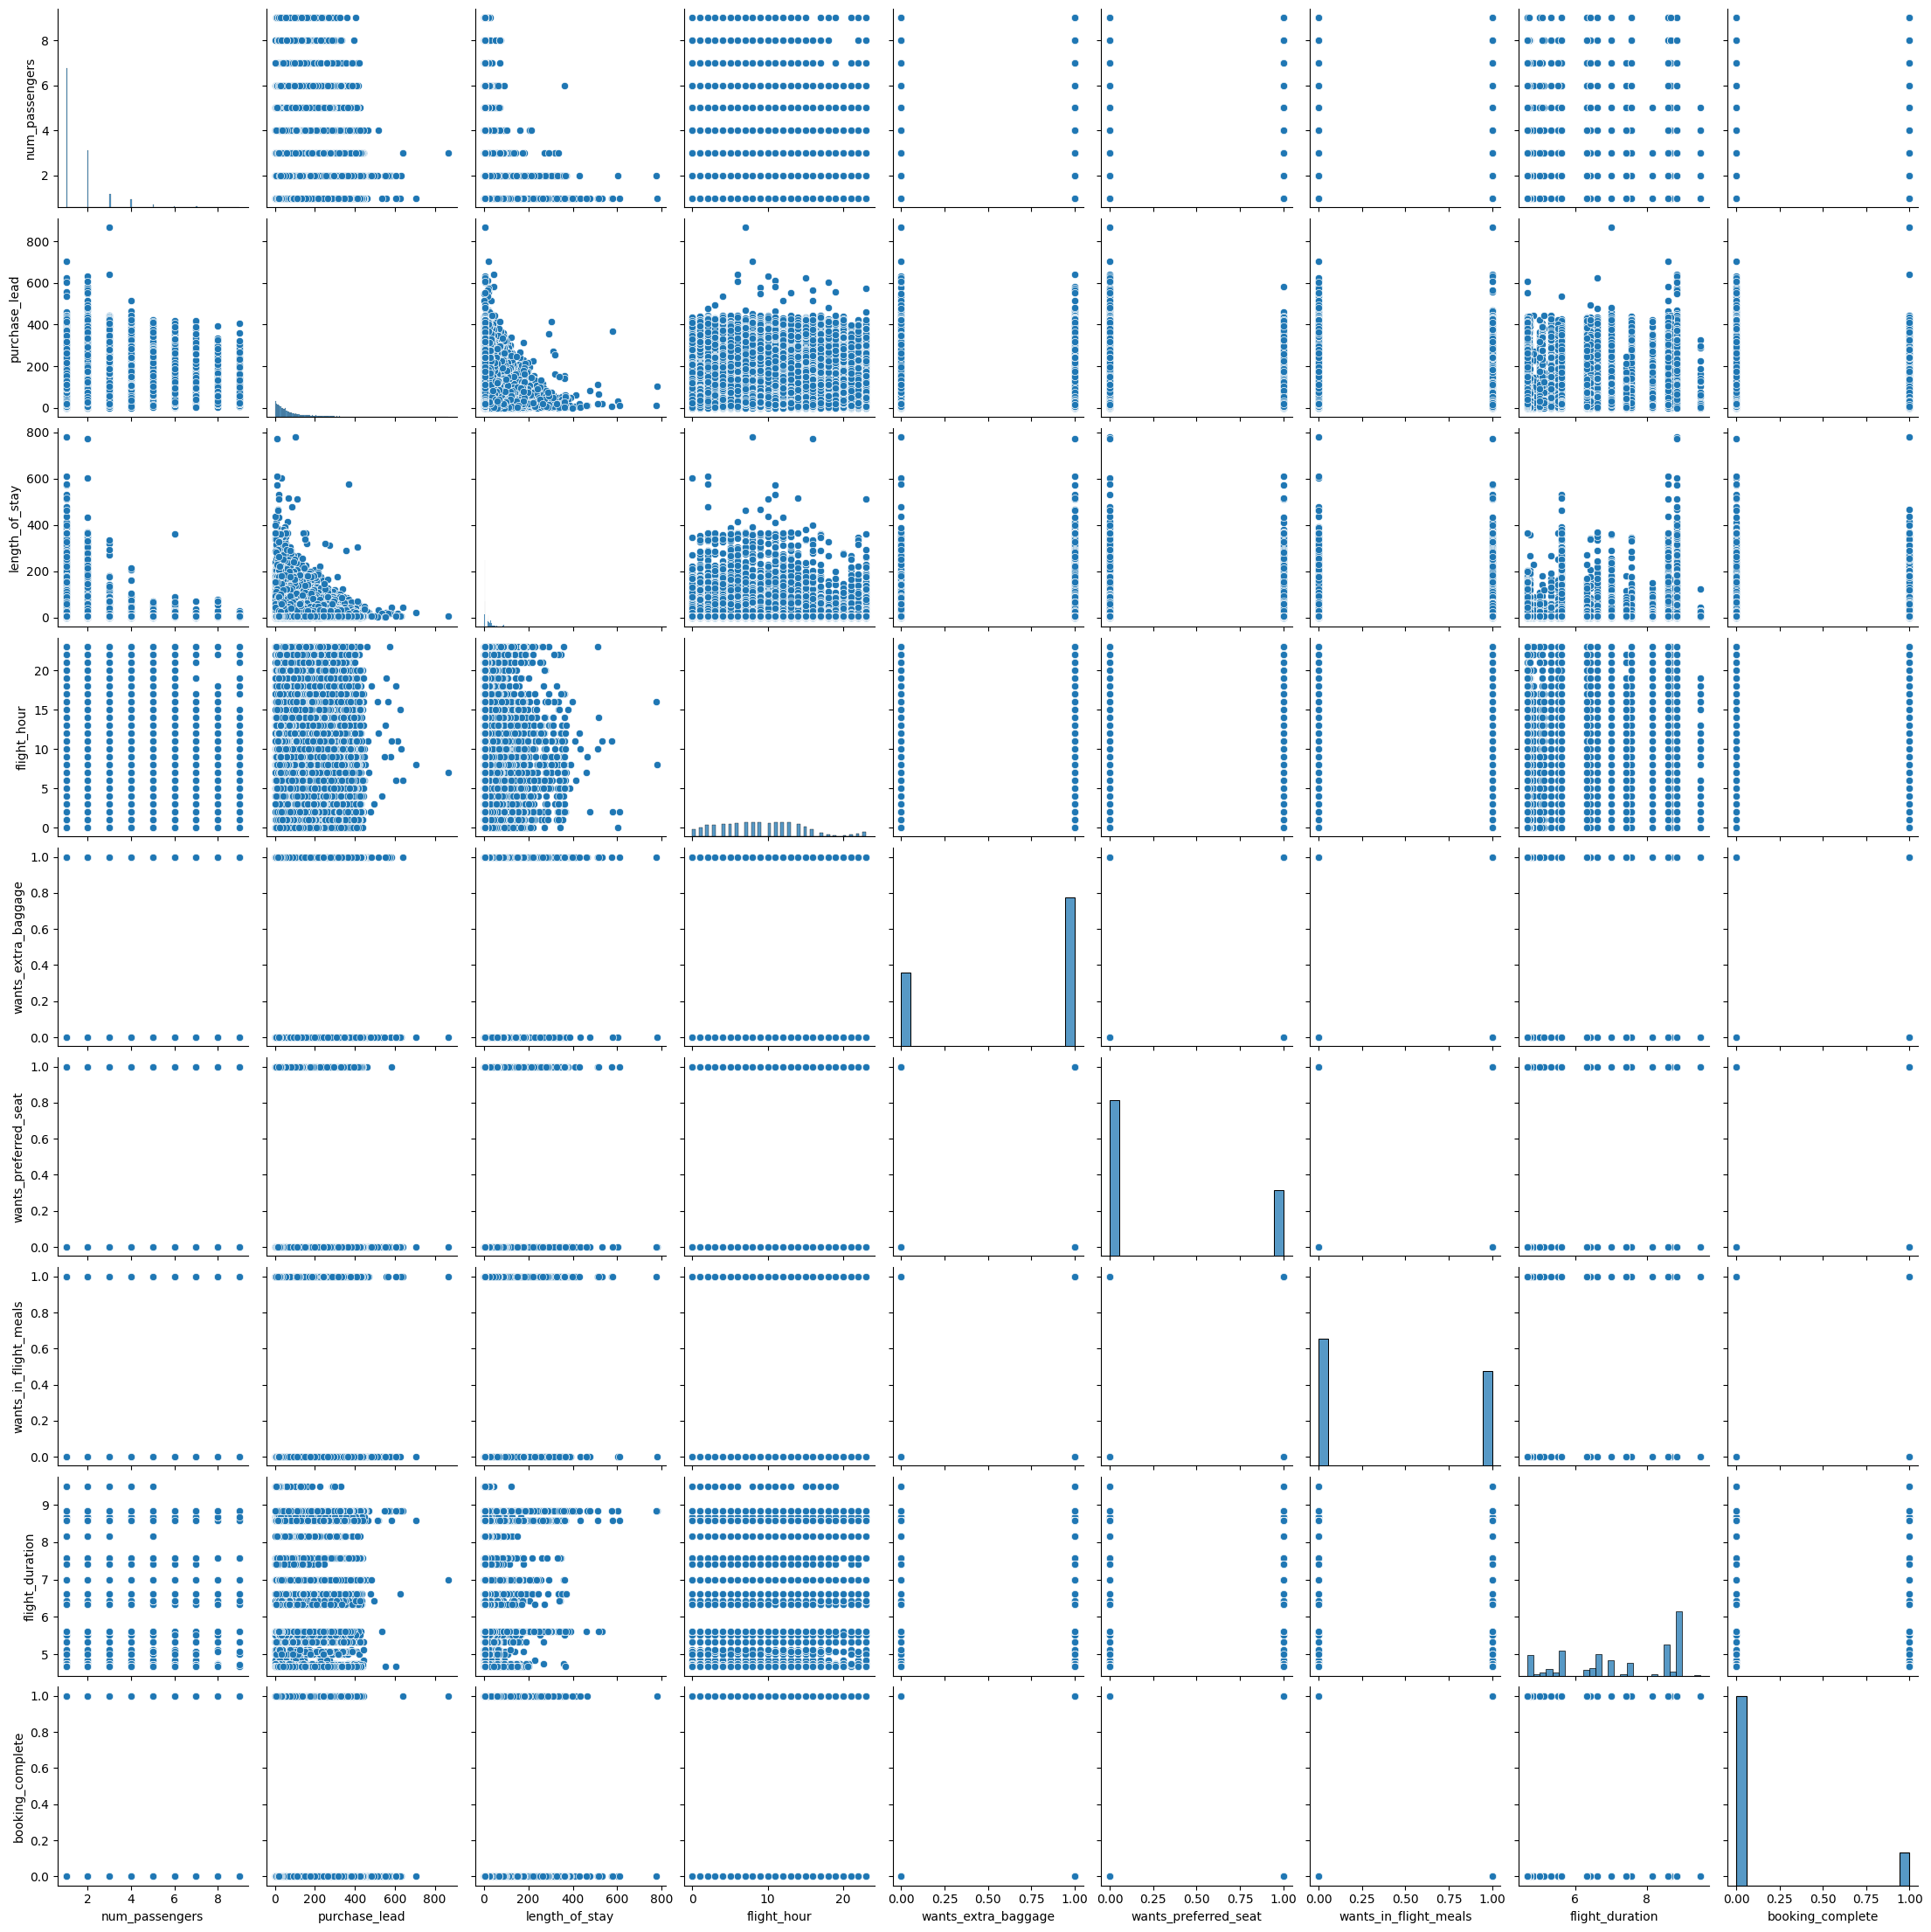

In [53]:
# Returns both train and test split separately
sns.pairplot(data)

In [54]:
data = data[data['length_of_stay'] <= 700]
data = data[data['purchase_lead'] <= 600]


In [55]:
data.shape

(49990, 14)

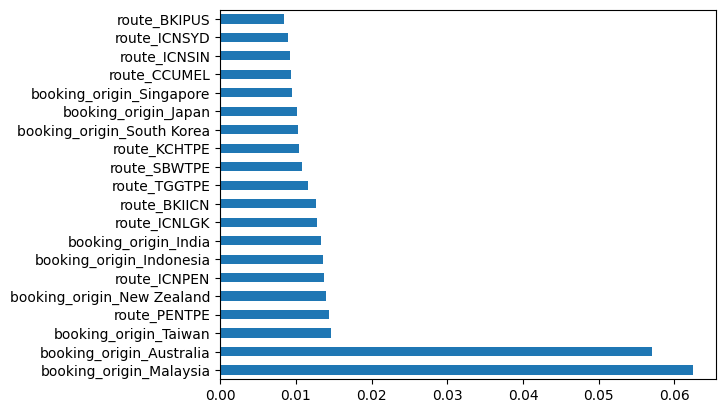

In [66]:
feat_importances = pd.Series(xgb_model.feature_importances_, index=trainX.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()